In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense


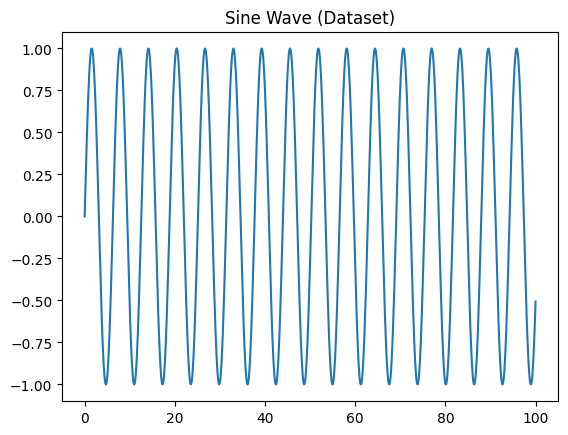

In [2]:
# Generate a sine wave as dataset
x = np.linspace(0, 100, 1000)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Wave (Dataset)")
plt.show()


In [3]:
# Function to create sequences
def create_dataset(series, time_steps=10):
    X, Y = [], []
    for i in range(len(series)-time_steps):
        X.append(series[i:(i+time_steps)])
        Y.append(series[i+time_steps])
    return np.array(X), np.array(Y)

time_steps = 20
X, Y = create_dataset(y, time_steps)

# Reshape input to [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)
print("Shape of X:", X.shape, "Shape of Y:", Y.shape)


Shape of X: (980, 20, 1) Shape of Y: (980,)


In [4]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


c:\Users\deepa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X, Y, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2293
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4641e-04
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7869e-04
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7164e-04
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.4413e-05
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8580e-05
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0269e-05
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2318e-06
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5036e-06
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.5761e-07
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.0421e-07
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5510e-07
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1523e-07
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


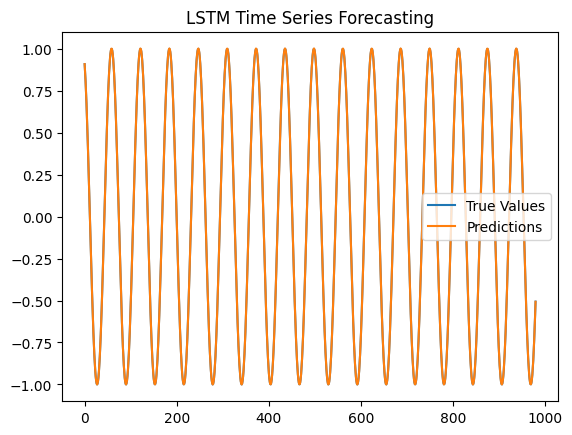

In [6]:
predictions = model.predict(X)

plt.plot(Y, label="True Values")
plt.plot(predictions, label="Predictions")
plt.legend()
plt.title("LSTM Time Series Forecasting")
plt.show()
